In [1]:
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

sns.set()
%matplotlib inline

In [2]:
#Reading all the given files as dataframes

location_df = pd.read_csv('D:\\DS - AI\\012_Stats & ML by Sundaram\\28_Project\\Geo_scores.csv')
location_df.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [3]:
propindex_df = pd.read_csv('D:\\DS - AI\\012_Stats & ML by Sundaram\\28_Project\\Lambda_wts.csv')
propindex_df.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [4]:
nettat_df = pd.read_csv('D:\\DS - AI\\012_Stats & ML by Sundaram\\28_Project\\Qset_tats.csv')
nettat_df.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [5]:
vqs_df = pd.read_csv('D:\\DS - AI\\012_Stats & ML by Sundaram\\28_Project\\instance_scores.csv')
vqs_df.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [6]:
dataset_df = pd.read_csv('D:\\DS - AI\\012_Stats & ML by Sundaram\\28_Project\\train.csv')
dataset_df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [7]:
# Getting the details of only fraudulent data from train dataset

fraud_test_df = dataset_df.loc[dataset_df['Target'] == 1, :]
fraud_test_df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
357,64460,Grp1075,-3.070000,3.303333,-3.996667,2.110000,-2.160000,-0.503333,-2.313333,3.233333,...,0.980000,0.336667,0.573333,0.656667,0.880000,0.580000,1.026667,0.736667,-225.0025,1
591,131272,Grp28,0.630000,1.013333,1.326667,1.710000,0.420000,1.183333,0.100000,-0.066667,...,0.323333,1.066667,0.630000,0.750000,0.900000,0.826667,0.710000,0.740000,-249.9500,1
1792,154633,Grp359,0.326667,1.166667,-0.830000,1.280000,0.876667,-0.246667,0.150000,0.820000,...,0.923333,0.953333,0.566667,0.613333,0.803333,0.593333,0.796667,0.660000,-244.4900,1
1801,15506,Grp787,-6.630000,4.976667,-7.366667,2.733333,-4.823333,-0.820000,-4.840000,5.513333,...,1.253333,0.140000,0.350000,0.710000,1.170000,0.593333,1.176667,0.816667,-225.0025,1
2031,204064,Grp1317,0.743333,0.980000,-0.883333,1.693333,0.033333,0.320000,0.326667,0.850000,...,0.970000,1.013333,1.000000,0.966667,0.516667,0.730000,0.726667,0.656667,-163.7500,1


In [8]:
fraud_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 357 to 227383
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              394 non-null    int64  
 1   Group           394 non-null    object 
 2   Per1            394 non-null    float64
 3   Per2            394 non-null    float64
 4   Per3            394 non-null    float64
 5   Per4            394 non-null    float64
 6   Per5            394 non-null    float64
 7   Per6            394 non-null    float64
 8   Per7            394 non-null    float64
 9   Per8            394 non-null    float64
 10  Per9            394 non-null    float64
 11  Dem1            394 non-null    float64
 12  Dem2            394 non-null    float64
 13  Dem3            394 non-null    float64
 14  Dem4            394 non-null    float64
 15  Dem5            394 non-null    float64
 16  Dem6            394 non-null    float64
 17  Dem7            394 non-null    flo

In [9]:
# Ploting the additional data of all fraudulent transaction to look for any insights

# Getting the ids of all fraudulent transactions
fraud_id = list(fraud_test_df['id'])
fraud_id

[64460,
 131272,
 154633,
 15506,
 204064,
 80760,
 42945,
 8617,
 204503,
 219025,
 42473,
 223572,
 69498,
 77682,
 83053,
 88876,
 6329,
 93424,
 154676,
 243848,
 237107,
 9509,
 18466,
 53591,
 55401,
 17407,
 68320,
 102782,
 252124,
 15751,
 79874,
 18809,
 243547,
 50211,
 191074,
 151103,
 79883,
 243393,
 154371,
 123270,
 151462,
 6529,
 15810,
 150662,
 15736,
 88258,
 163586,
 203324,
 214775,
 33276,
 150697,
 154668,
 241254,
 123238,
 150692,
 156988,
 276071,
 119781,
 75511,
 251904,
 182992,
 91671,
 58422,
 6108,
 235634,
 247995,
 116404,
 99506,
 16780,
 238222,
 81609,
 244333,
 204079,
 281674,
 149145,
 30398,
 213092,
 15225,
 10897,
 157585,
 272521,
 143728,
 151807,
 106998,
 14104,
 192687,
 44556,
 223618,
 137705,
 123301,
 8845,
 234633,
 63421,
 93486,
 124176,
 248296,
 243749,
 63634,
 10690,
 274382,
 83297,
 258403,
 215953,
 154454,
 15539,
 150660,
 6338,
 251866,
 29687,
 57248,
 149600,
 44223,
 249239,
 229712,
 6899,
 42741,
 251891,
 233258,

In [10]:
fraud_group = list(fraud_test_df['Group'])
fraud_group

['Grp1075',
 'Grp28',
 'Grp359',
 'Grp787',
 'Grp1317',
 'Grp1116',
 'Grp1004',
 'Grp616',
 'Grp1168',
 'Grp237',
 'Grp990',
 'Grp1341',
 'Grp1088',
 'Grp1110',
 'Grp382',
 'Grp635',
 'Grp558',
 'Grp1134',
 'Grp1254',
 'Grp1363',
 'Grp1354',
 'Grp641',
 'Grp794',
 'Grp497',
 'Grp259',
 'Grp822',
 'Grp140',
 'Grp264',
 'Grp1351',
 'Grp795',
 'Grp564',
 'Grp847',
 'Grp1360',
 'Grp1045',
 'Grp185',
 'Grp408',
 'Grp240',
 'Grp1271',
 'Grp726',
 'Grp1181',
 'Grp1248',
 'Grp570',
 'Grp270',
 'Grp1234',
 'Grp794',
 'Grp270',
 'Grp1163',
 'Grp1118',
 'Grp358',
 'Grp950',
 'Grp1243',
 'Grp1252',
 'Grp1356',
 'Grp1081',
 'Grp1242',
 'Grp931',
 'Grp665',
 'Grp1172',
 'Grp1102',
 'Grp1376',
 'Grp398',
 'Grp51',
 'Grp169',
 'Grp548',
 'Grp1353',
 'Grp1368',
 'Grp497',
 'Grp1143',
 'Grp394',
 'Grp1241',
 'Grp1106',
 'Grp1366',
 'Grp107',
 'Grp158',
 'Grp544',
 'Grp930',
 'Grp13',
 'Grp780',
 'Grp671',
 'Grp423',
 'Grp363',
 'Grp933',
 'Grp593',
 'Grp1106',
 'Grp335',
 'Grp792',
 'Grp1020',
 'Grp754'

In [11]:
fraud_location_df = location_df[location_df['id'].isin(fraud_id)]
fraud_location_df.head()

,id,geo_score
578,123301,4.48
801,27738,-3.10
1600,93486,6.55
2814,17366,9.31
3442,30314,-46.23


In [12]:
fraud_propindex_df = propindex_df[propindex_df['Group'].isin(fraud_group)]
fraud_propindex_df.head()

,Group,lambda_wt
5,Grp1168,-4.90
6,Grp221,1.08
8,Grp619,-7.84
9,Grp128,-0.90
16,Grp1252,-10.45


In [13]:
fraud_nettat_df = nettat_df[nettat_df['id'].isin(fraud_id)]
fraud_nettat_df.head()

,id,qsets_normalized_tat
254,42549,7.24
1262,144104,-1.03
1689,106998,-3.79
1876,95534,3.79
2072,240222,NaN


In [14]:
fraud_vqs_df = vqs_df[vqs_df['id'].isin(fraud_id)]
fraud_vqs_df.head()

,id,instance_scores
182,279863,-0.88
302,4920,0.76
726,263274,-0.88
1504,251904,-28.35
2106,154668,0.48


### Plotting the data for insights

In [23]:
# fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30,30))

# ax[0][0].stairs(values = fraud_location_df['geo_score'])
# ax[0][1].stairs(values = fraud_propindex_df['lambda_wt'], color = 'y')
# ax[1][0].stairs(values = fraud_nettat_df['qsets_normalized_tat'], color = 'r')
# ax[1][1].stairs(values = fraud_vqs_df['instance_scores'], color = 'g')

In [24]:
# fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30,30))

# ax[0][0].scatter(y = fraud_location_df['geo_score'], x = range(len(fraud_location_df)))
# ax[0][1].scatter(y = fraud_propindex_df['lambda_wt'], x = range(len(fraud_propindex_df)), c = 'y')
# ax[1][0].scatter(y = fraud_nettat_df['qsets_normalized_tat'], x = range(len(fraud_nettat_df)), c = 'r')
# ax[1][1].scatter(y = fraud_vqs_df['instance_scores'], x = range(len(fraud_vqs_df)), c = 'g')

In [17]:
# Scalling before plotting 

scaler = StandardScaler()

fraud_propindex_df = fraud_propindex_df.drop('Group', axis = 1)

scld_fraud_location_df = pd.DataFrame(scaler.fit_transform(fraud_location_df))
scld_fraud_propindex_df = pd.DataFrame(scaler.fit_transform(fraud_propindex_df))
scld_fraud_nettat_df = pd.DataFrame(scaler.fit_transform(fraud_nettat_df))
scld_fraud_vqs_df = pd.DataFrame(scaler.fit_transform(fraud_vqs_df))

In [25]:
# fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30,30))

# ax[0][0].stairs(values = scld_fraud_location_df[0])
# ax[0][1].stairs(values = scld_fraud_propindex_df[0], color = 'y')
# ax[1][0].stairs(values = scld_fraud_nettat_df[0], color = 'r')
# ax[1][1].stairs(values = scld_fraud_vqs_df[0], color = 'g')

In [26]:
# fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30,30))

# ax[0][0].scatter(y = scld_fraud_location_df[0], x = range(len(fraud_location_df)))
# ax[0][1].scatter(y = scld_fraud_propindex_df[0], x = range(len(fraud_propindex_df)), c = 'y')
# ax[1][0].scatter(y = scld_fraud_nettat_df[0], x = range(len(fraud_nettat_df)), c = 'r')
# ax[1][1].scatter(y = scld_fraud_vqs_df[0], x = range(len(fraud_vqs_df)), c = 'g')

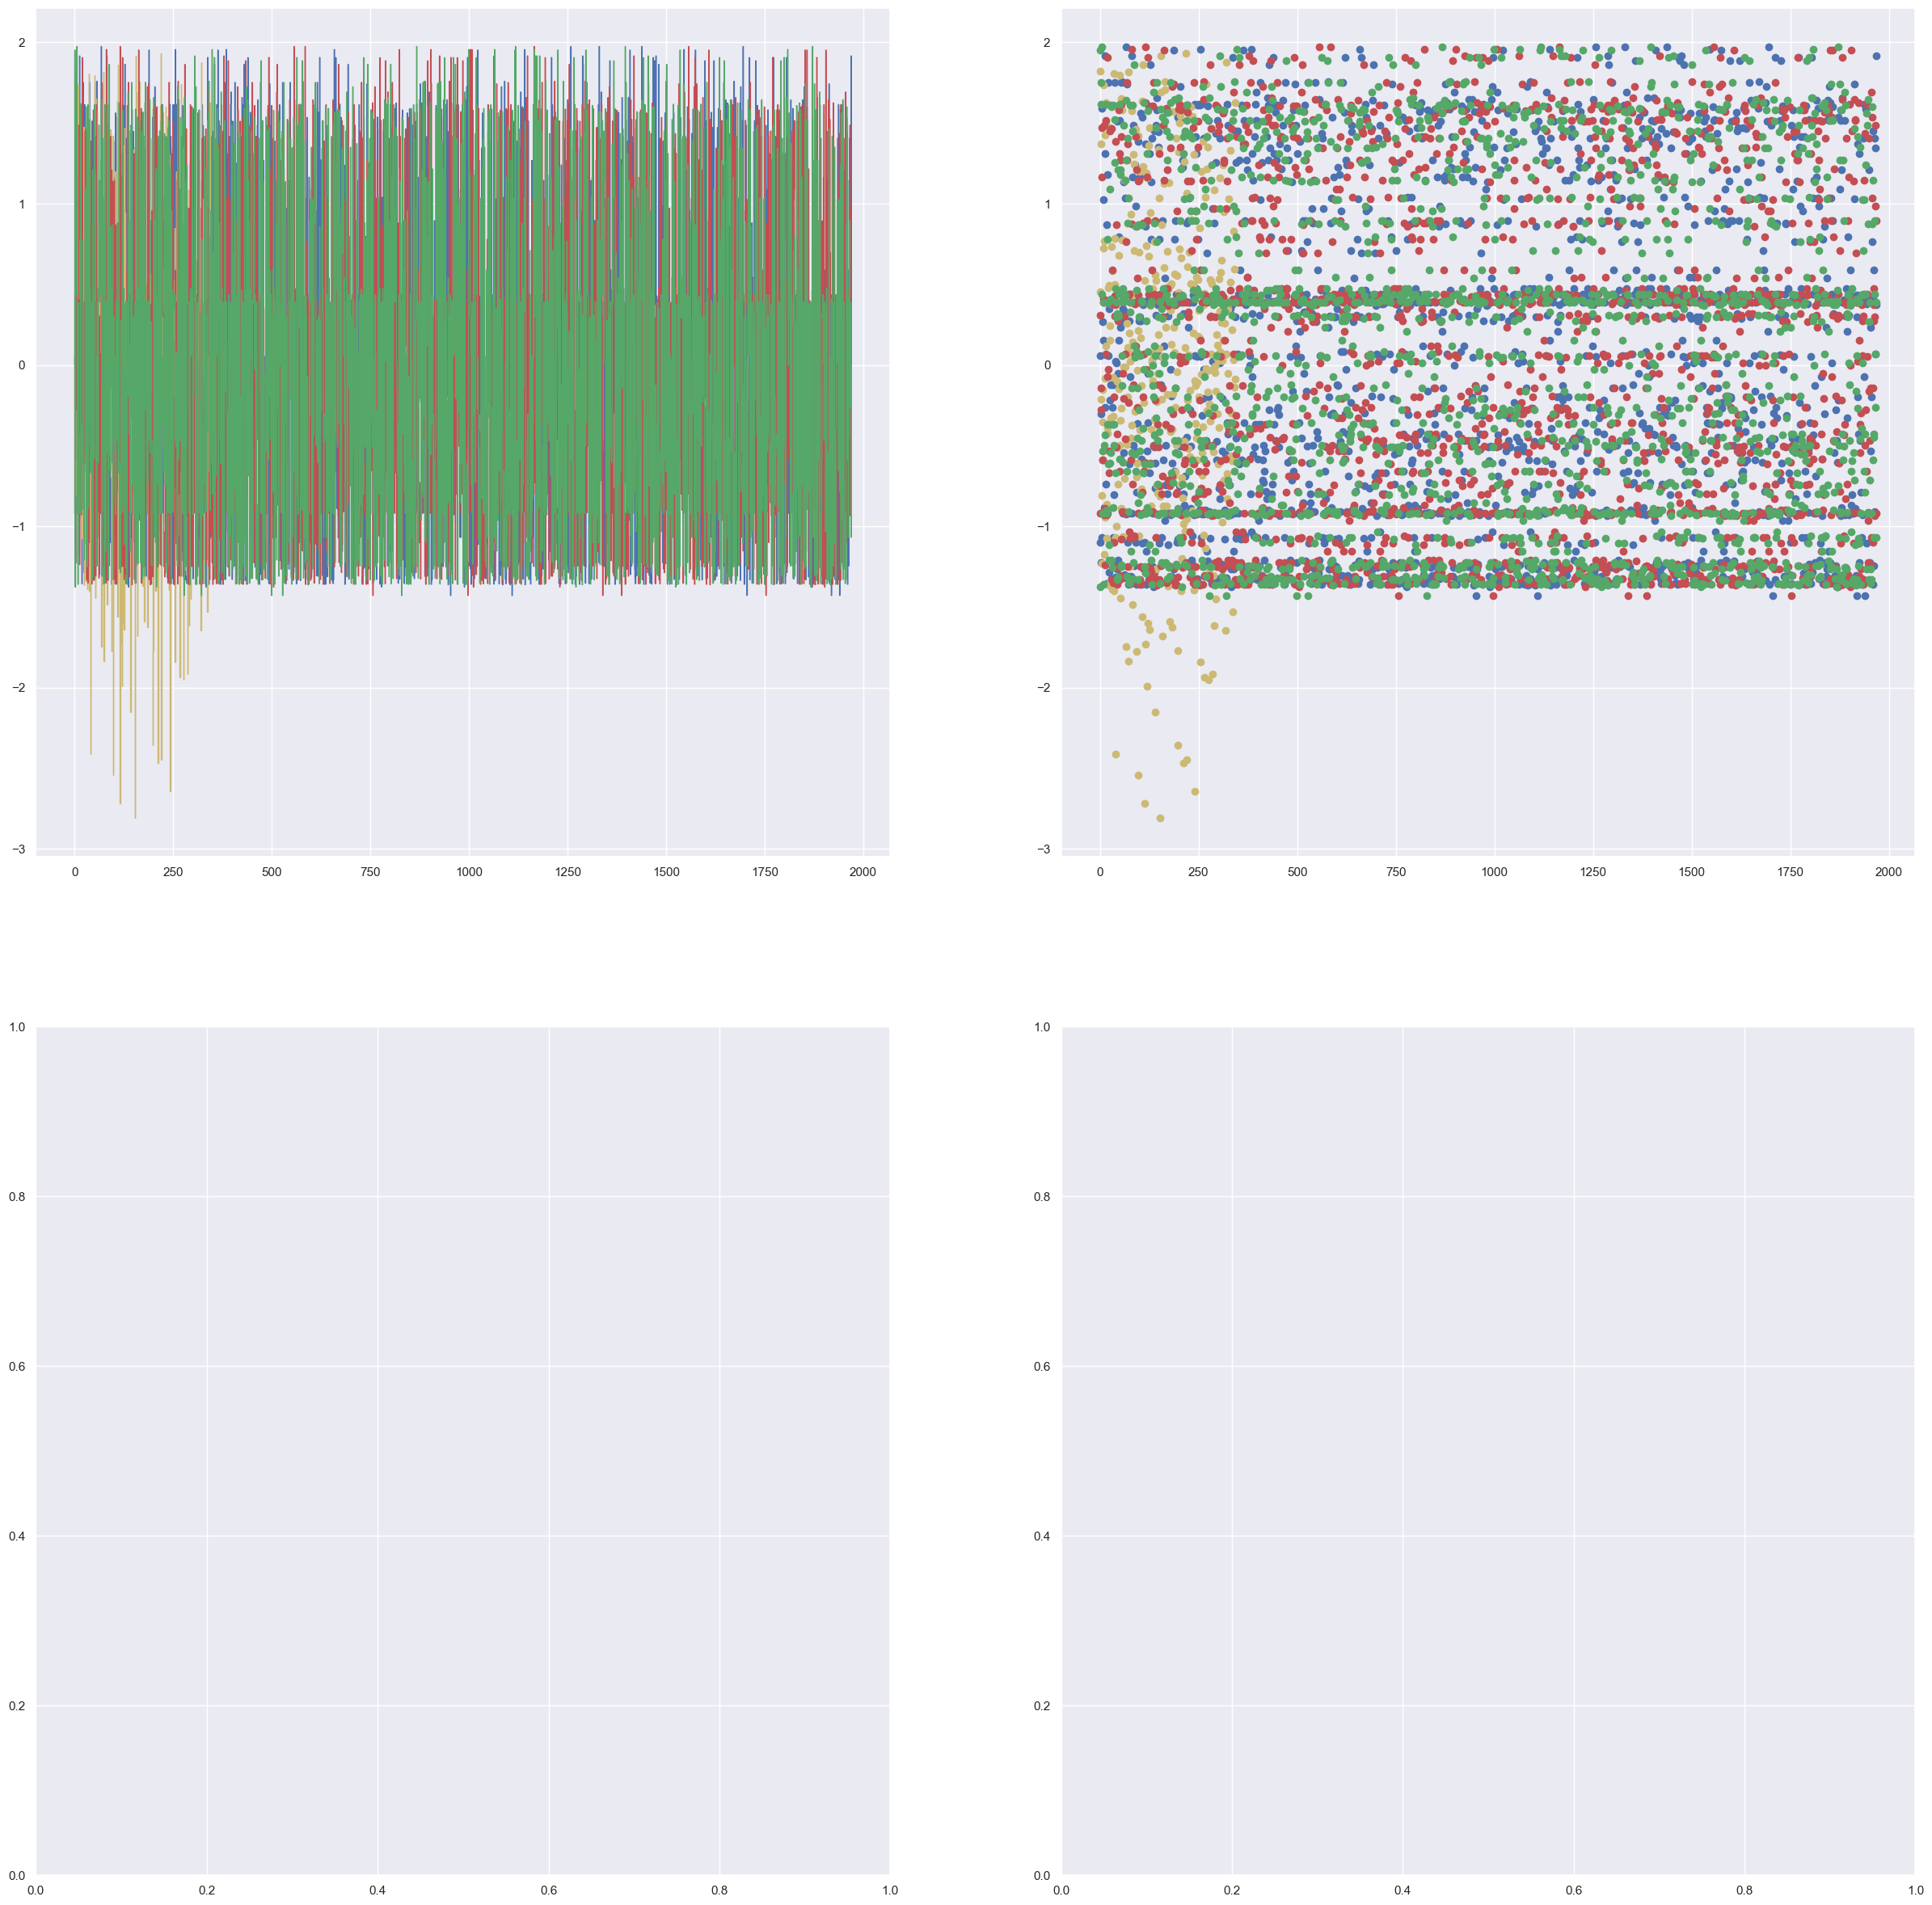

In [37]:
# Ploting all the scalled data in same graph

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30,30))

ax[0][0].stairs(values = scld_fraud_location_df[0])
ax[0][0].stairs(values = scld_fraud_propindex_df[0], color = 'y')
ax[0][0].stairs(values = scld_fraud_nettat_df[0], color = 'r')
ax[0][0].stairs(values = scld_fraud_vqs_df[0], color = 'g')

ax[0][1].scatter(y = scld_fraud_location_df[0], x = range(len(fraud_location_df)))
ax[0][1].scatter(y = scld_fraud_propindex_df[0], x = range(len(fraud_propindex_df)), c = 'y')
ax[0][1].scatter(y = scld_fraud_nettat_df[0], x = range(len(fraud_nettat_df)), c = 'r')
ax[0][1].scatter(y = scld_fraud_vqs_df[0], x = range(len(fraud_vqs_df)), c = 'g')